# KMeans implementation

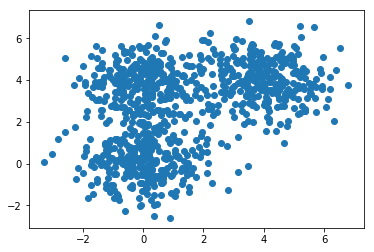

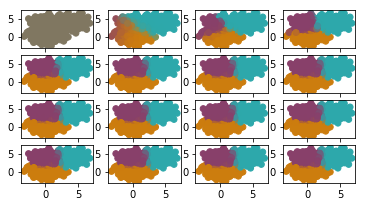

In [7]:
import numpy as np
import  matplotlib.pyplot as plt

def d(u,v):
    diff=u-v
    return diff.dot(diff)

def cost(X,R,M):
    cost=0
    for k in range(len(M)):
        diff=X-M[k]
        seq=(diff*diff).sum(axis=1)
        cost+=(R[:,k]*seq).sum()
#     print(R[1,1])
        
    return cost
            
def plot_k_means(K,X,max_iter=20,beta=1.0,show_plot=True):
    N,D=X.shape
    M=np.zeros((K,D))
#     exponents=np.empty((N,K))
    R=np.ones((N,K))/K
    for k in range(K):
        M[k]=X[np.random.choice(N)]
    costs=np.zeros(max_iter)
    grid_width = 5
    grid_height = max_iter / grid_width
    random_colors = np.random.random((K, 3))
    plt.figure()
    for i in range(max_iter):
        colors = R.dot(random_colors)
        plt.subplot(grid_width, grid_height, i+1)
#         print(colors.shape)
#         plt.scatter(X[:,0], X[:,1], c=colors)
        plt.scatter(X[:,0], X[:,1], c=colors)

        for k in range(K):
            for n in range(N):
#                 exponents[n,k]=np.exp(-beta*d(M[k],X[n]))
                R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum( np.exp(-beta*d(M[j], X[n])) for j in range(K) )
#                 exponents[n,k] = np.exp(-beta*d(M[k], X[n]))
#         R=exponents/exponents.sum(axis=1,keepdims=True)
#         print(R[1,1])
        
        for k in range(K):
            M[k]=R[:,k].dot(X)/R[:,k].sum()

        costs[i]=cost(X,R,M)
        if i>0:
            if np.abs(costs[i]-costs[i-1])<1e-5:
                break
#     if show_plot:
#         plt.plot(costs)
#         plt.title('costs')
#         plt.show()

#         random_colors = np.random.random((K, 3))
#         colors = R.dot(random_colors)
#         plt.scatter(X[:,0], X[:,1], c=colors)
    plt.show()
    return M,R

        

def get_sample_data():
    D=2
    s=4
    mu1=np.array([0,0])
    mu2=np.array([s,s])
    mu3=np.array([0,s])
    N=900
    X=np.zeros((N,D))
    X[:300,:]=np.random.randn(300,D)+mu1
    X[300:600,:]=np.random.randn(300,D)+mu2
    X[600:N,:]=np.random.randn(300,D)+mu3
    return X


def main():
    X=get_sample_data()
    plt.scatter(X[:,0],X[:,1])
    plt.show()
    
    K=3
    plot_k_means(K,X)
    
#     K=5
#     plot_k_means(K,X)
    
#     K=5
#     plot_k_means(K,X,max_iter=30)

#     K=5
#     plot_k_means(K,X,max_iter=30,beta=.3)
    
if __name__=="__main__":
    main()
    

# Kmeans Visualization 

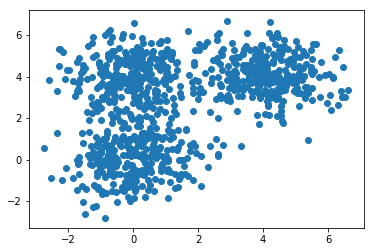

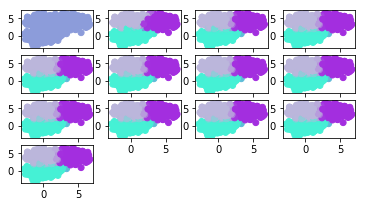

In [8]:
# https://deeplearningcourses.com/c/cluster-analysis-unsupervised-machine-learning-python
# https://www.udemy.com/cluster-analysis-unsupervised-machine-learning-python
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import matplotlib.pyplot as plt


def d(u, v):
    diff = u - v
    return diff.dot(diff)


def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        for n in range(len(X)):
            cost += R[n,k]*d(M[k], X[n])
    return cost


def plot_k_means(X, K, max_iter=20, beta=1.0):
    N, D = X.shape
    M = np.zeros((K, D))
    R = np.ones((N, K)) / K

    # initialize M to random
    for k in range(K):
        M[k] = X[np.random.choice(N)]

    grid_width = 5
    grid_height = max_iter / grid_width
    random_colors = np.random.random((K, 3))
    plt.figure()

    costs = np.zeros(max_iter)
    for i in range(max_iter):
        # moved the plot inside the for loop
        colors = R.dot(random_colors)
#         print(colors.shape)
        plt.subplot(grid_width, grid_height, i+1)
        plt.scatter(X[:,0], X[:,1], c=colors)

        # step 1: determine assignments / resposibilities
        # is this inefficient?
        for k in range(K):
            for n in range(N):
                R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum( np.exp(-beta*d(M[j], X[n])) for j in range(K) )

        # step 2: recalculate means
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:,k].sum()

        costs[i] = cost(X, R, M)
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 1e-5:
                break
    plt.show()


def main():
    # assume 3 means
    D = 2 # so we can visualize it more easily
    s = 4 # separation so we can control how far apart the means are
    mu1 = np.array([0, 0])
    mu2 = np.array([s, s])
    mu3 = np.array([0, s])

    N = 900 # number of samples
    X = np.zeros((N, D))
    X[:300, :] = np.random.randn(300, D) + mu1
    X[300:600, :] = np.random.randn(300, D) + mu2
    X[600:, :] = np.random.randn(300, D) + mu3

    # what does it look like without clustering?
    plt.scatter(X[:,0], X[:,1])
    plt.show()

    K = 3 # luckily, we already know this
    plot_k_means(X, K)

    # K = 5 # what happens if we choose a "bad" K?
    # plot_k_means(X, K, max_iter=30)

    # K = 5 # what happens if we change beta?
    # plot_k_means(X, K, max_iter=30, beta=0.3)


if __name__ == '__main__':
    main()
